# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 12 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Anirudh Narayanan </font>

# Introduction

The objective of the assignment is to implement linear regression algorithms to attain best possible weight and features to fit the best line to a linear regression graph so as to reduce the cost function to the global minima.

#  Data Description

The data represents different weather features in Australia, like weather, temperature, humidity, windspeed etc. This data can be very useful for regression in that, the past can be used to predict how the future weather conditions can be. This data can also be very useful when considering classification, in that places/years can be classified upon, based on the data which they have. A good example is Melbourne Aiport vs Portland's Humidity vs Rainfall which has clear demarcations, and can be used during classifying new data during one of these years, or of future data which is of Rainfall/Humidity during any part of the year.

# Column Pre-Processing

For this process, each of the columns were evaluated with respect to their null values. The reason for this was, removing None values by the row causes issues, in that there may be columns which don't have enough data in them, and hence might have a large percentage of them as None. Due to this, the percentage of null values in each column were evaluated before processing. If the percentage of the column's null values were more than 70%, the entire columns were dropped in lieu of insufficient information.

# Row Pre-Processing

Row Pre-Processing¶
Further, the rows were removed by iteration through the entire data, thereby too many rows were not removed just because some columns had bad information. This had to be done, using a dual loop. Each column had to be iterated for each row iteration. This was because, pandas hashes the information column wise, and not row/dual.

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


# PLOTS FOR UNDERSTANDING OR ANALYSIS

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d


df = pd.read_csv("ausweather_preprocessed.csv",sep="\t")

grouped_by_month_rainfall = df.groupby([df.Date.str[:7],"Location"])["Location","MaxTemp","Humidity9am"].mean().reset_index()

#print grouped_by_month_rainfall
grouped_2013 = grouped_by_month_rainfall
grouped_2013 = grouped_by_month_rainfall[ (grouped_2013["Location"]=="Katherine")  | (grouped_2013["Location"]=="Bendigo") ]

#print grouped_2013



plt.figure(figsize=(15,8))
plt.title("Humidity vs Max Temperature of 2 Australian Locations")
plt.xlabel('Humidity', fontsize=18)
plt.ylabel('Max Temperature', fontsize=16)
#EXAMPLE OF A SIMPLE TWO DIVISION CLUSTER. DATA FROM EITHER ONE OF THE SOURCES CAN BE CLASSIFIED TO EITHER ONE BASED ON SOME CLASSIFICATION ALGORITHM
for name,group in grouped_2013.groupby("Location"):
    plt.scatter(group["Humidity9am"],group["MaxTemp"],label=name)
    plt.legend()
 


grouped3d = df.groupby([df.Date.str[:7],"Location"])["Location","MaxTemp","Humidity9am","Rainfall"].mean().reset_index()

grouped3d = grouped3d[grouped3d["Location"]=="Canberra"]

#print grouped3d


<Figure size 1080x576 with 0 Axes>

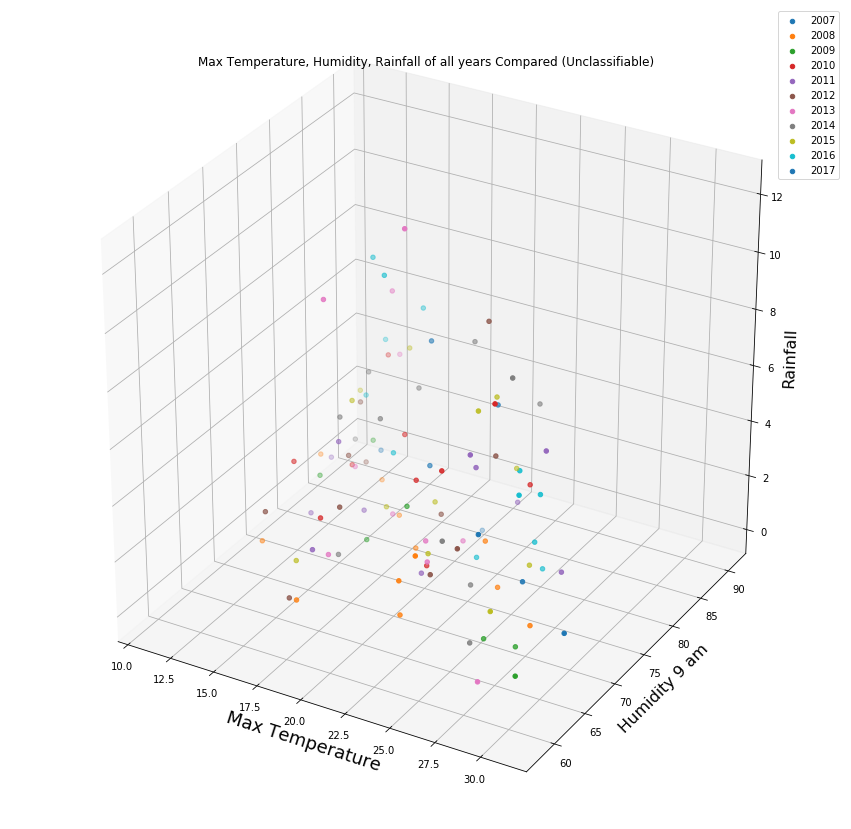

<Figure size 1080x576 with 0 Axes>

In [2]:
plt.figure(figsize=(15,8))
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Max Temperature, Humidity, Rainfall of all years Compared (Unclassifiable)")
ax.set_xlabel('Max Temperature', fontsize=18)
ax.set_ylabel('Humidity 9 am', fontsize=16)
ax.set_zlabel('Rainfall', fontsize=16)
for name,group in grouped3d.groupby(grouped3d.Date.str[:4]):
     ax.scatter(group["MaxTemp"],group["Humidity9am"],group["Rainfall"],label=name)
     ax.legend()

    
grouped3d = grouped3d[grouped3d["Location"]=="Canberra"].reset_index()

grouped3d =  grouped3d[(grouped3d["Date"].str[:4] == "2010") | (grouped3d["Date"].str[:4] == "2008")]



<Figure size 1080x576 with 0 Axes>

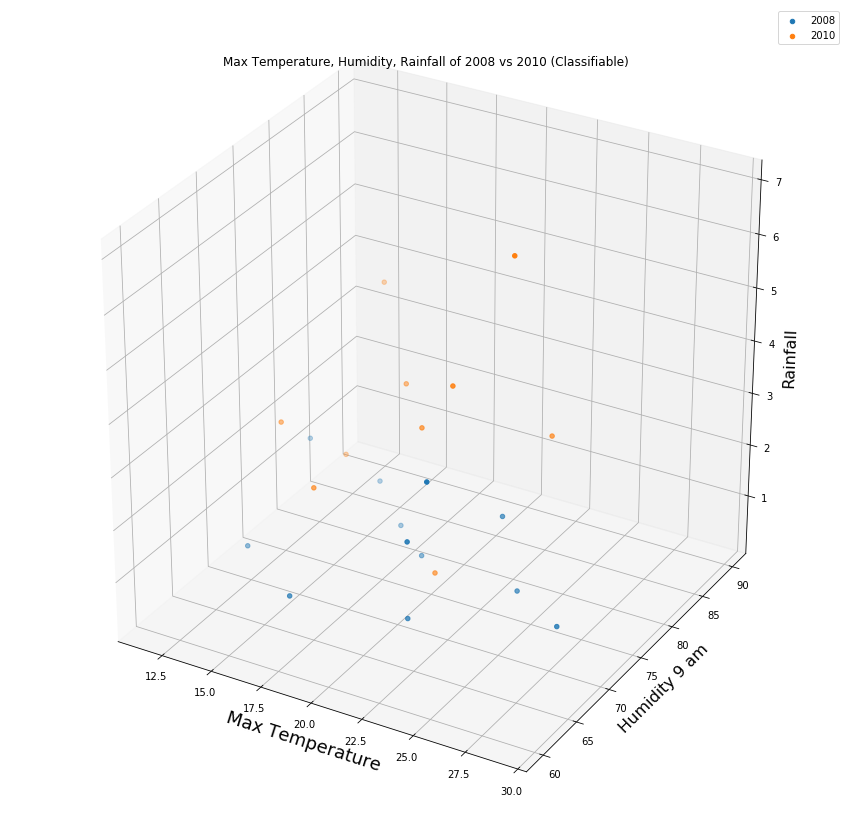

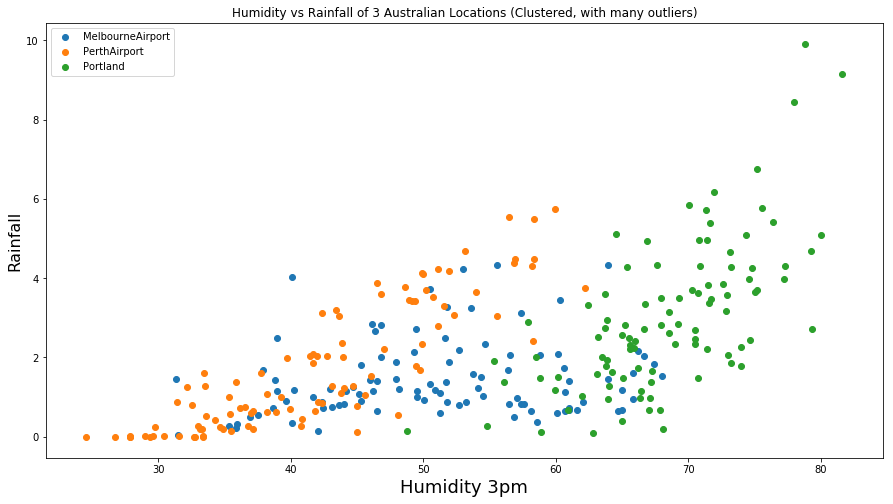

In [3]:
#DATA HERE CAN BE CLASSIFIED BETWEEN 2008 and 2010

#print grouped3d
plt.figure(figsize=(15,8))
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_title("Max Temperature, Humidity, Rainfall of 2008 vs 2010 (Classifiable)")
ax.set_xlabel('Max Temperature', fontsize=18)
ax.set_ylabel('Humidity 9 am', fontsize=16)
ax.set_zlabel('Rainfall', fontsize=16)
for name,group in grouped3d.groupby(grouped3d.Date.str[:4]):
     ax.scatter(group["MaxTemp"],group["Humidity9am"],group["Rainfall"],label=name)
     ax.legend()


canberra_rainfall_df = df.groupby([df.Date.str[:7],"Location"]).mean().reset_index()[["Humidity3pm","Rainfall","Location"]]
canberra_df_humidity = df.groupby([df.Date.str[:7]]).mean().reset_index()[["Date","Humidity3pm"]]
canberra_df_clouds = df.groupby([df.Date.str[:7]]).mean().reset_index()[["Date","Cloud3pm"]]

#print canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Katherine")  | (canberra_rainfall_df["Location"]=="Bendigo")]
#print canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Portland")  | (canberra_rainfall_df["Location"]=="MelbourneAirport")]
#canberra_rainfall_df = canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Katherine")  | (canberra_rainfall_df["Location"]=="Bendigo")]

canberra_rainfall_df = canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Portland")  | (canberra_rainfall_df["Location"]=="MelbourneAirport") | (canberra_rainfall_df["Location"]=="PerthAirport") ]


plt.title("Humidity vs Rainfall of 3 Australian Locations (Clustered, with many outliers)")
plt.xlabel('Humidity 3pm', fontsize=18)
plt.ylabel('Rainfall', fontsize=16)
for name,group in canberra_rainfall_df.groupby("Location"):
    plt.scatter(group["Humidity3pm"],group["Rainfall"],label=name)
    plt.legend()

    
    
plt.show()

    



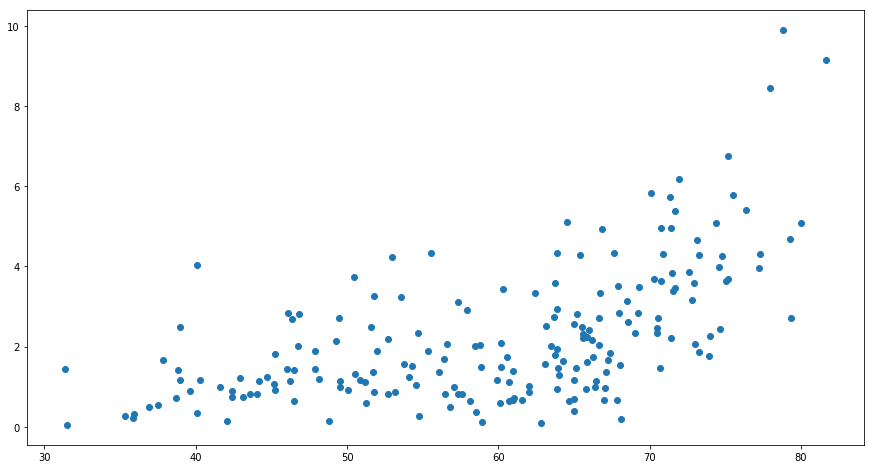

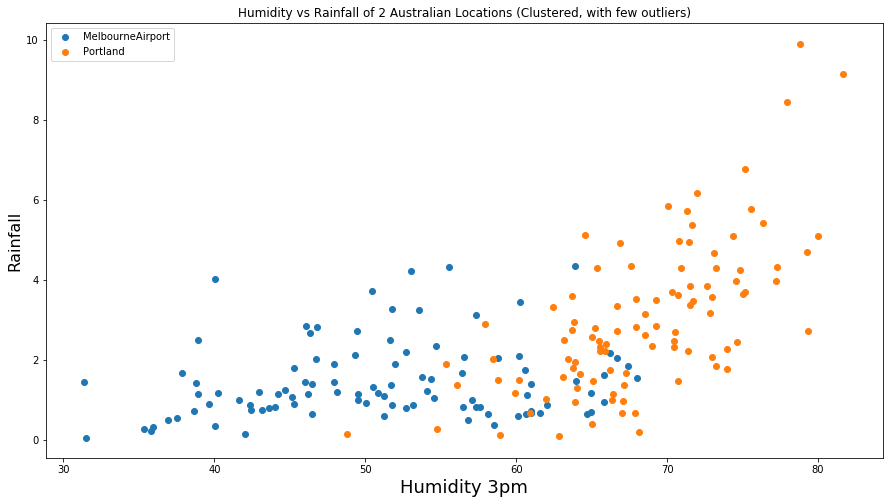

In [4]:
plt.figure(figsize=(15,8))
canberra_rainfall_df = canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Portland")  | (canberra_rainfall_df["Location"]=="MelbourneAirport") ]

plt.scatter(canberra_rainfall_df["Humidity3pm"],canberra_rainfall_df["Rainfall"])

plt.figure(figsize=(15,8))
plt.title("Humidity vs Rainfall of 2 Australian Locations (Clustered, with few outliers)")
plt.xlabel('Humidity 3pm', fontsize=18)
plt.ylabel('Rainfall', fontsize=16)
for name,group in canberra_rainfall_df.groupby("Location"):
    plt.scatter(group["Humidity3pm"],group["Rainfall"],label=name)
    plt.legend()

    


#  Preliminary Observation


### Super Classs Definition

In [4]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [5]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        xtx = X.T.dot(X)
        #print(xtx)
        #print(xtx.shape)
        self.w = np.linalg.pinv(xtx).dot(X.T).dot(T)
        self.w = self.w.T
        print(self.w)
        return self.w.T
        ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        hypothesis = self.w.dot(X.T)
        return hypothesis.T
        ## TODO: replace this with your codes

### Least Mean Squares

In [28]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        
    # batch training by using train_step function
    def train(self, X, T):
        iterations = 3000
        X = self.add_ones(X)
        self.w = np.zeros((1,X.shape[1]))
        #print("X is ")
        #print(X)
        #print("W is")
        #print(self.w)
        for i in range(iterations):            
            temp = self.w.dot(X.T)
            error = temp.T - T
            new_x = error.T.dot(X)
            self.w = self.w - ((self.alpha)*new_x)
        print("train response")
        return self.w
        pass  ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self,x,t):
        x = np.insert(x,0,1)
        x = x.reshape(1,len(x))
        #print(x)
        self.w = np.zeros((1,x.shape[1]))
        #print(self.w)
        #self.w = np.zeros((1,x.shape[1]))
        mult_x = x
        error = self.w.dot(mult_x.T) - t
        #print(error)
                                                 
        update_value = ((self.alpha)*error)*x
        self.w = self.w - update_value
        print(self.w)
        return self.w
        
        
    def train_step_full(self, x, t):
        x = self.add_ones(x)
        self.w = np.zeros((1,x.shape[1]))
        print(x[0])
        for i in range(x.shape[1]):
            #print(self.w)
            mult_x = np.reshape(x[i],(len(x[i]),1))
            error = self.w.dot(mult_x) - t[i]
            update_value = ((self.alpha)*error)*x[i]
            self.w = self.w - update_value
            #print(self.w)
        print("returning stochastic")
        return self.w
        
        pass  ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):
        X = self.add_ones(X)
        hypothesis = self.w.dot(X.T)
        return hypothesis.T
        pass  ## TODO: replace this with your codes
        

### Applying Regression On Real Data

In [25]:
#DATA PRE-PROCESSING

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("weatherAUS.csv")
print(df.columns[df.isna().any()].tolist())

#print df.iat[3,6] == df.iat[5953,6]
#print pd.isnull(df["Evaporation"][5955:5960]).all()
for item in list(df.columns.values):
    na_len = df[item].isna().sum()
    total_len = df[item].count()
    
    if na_len > 0.7*total_len:
        del df[item]


columns = list(df.columns.values)
col = 0

df.loc[df.index.dropna()]

for index,row in df.iterrows():
    removed = False
    col = 0
    while col < len(columns) and removed == False:
        if row[columns[col]] != row[columns[col]]:
            df.drop(index, inplace=True)
            removed = True
        col = col+1

df.to_csv("ausweather_preprocessed.csv", sep='\t', encoding='utf-8')

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


# METHOD

## REVIEW
Linear Regression is used to predict the next "y" value for the next "x" value. This can be done by fitting the best possible line on the existing set of points (scatter points). When the data is inputted into the regression trainer, it is tested against certain weights in a linear equation or polynomial equation depending upon our data. When we fit the data with the model, by reducing the cost function as much as possible, by the following three methods:

### 1) Least Squares
### 2) Batch Gradient Descent
### 3) Stochastic Gradient Descent

1) **Least Squares** is done by deriving the best possible value for the weights. This is done using a linear algebra formula obtained by equating the differential of the square of the difference of the hypothesis and the actual data. This will lead to us calculating the differntial of the squared error function, which takes us to the destined point, which is the global minima of a linear regression graph. 

2) **Batch Gradient Descent** : The more the iterations , and the more optimal the learning rate, the faster we reach the goal state. The learning rate alpha dictates how fast the global minima is reached. When the alpha value is too high, the graph overshoots the goal, and oscillates between low and high and isn't stabilized, since it changes too fast and tries to reach global minima faster than it is meant to .

3) **Stochastic Gradient Descent**: This is a method usually used when an incremental calculation method is necessary, which happens when the size of the data is so large that the data cannot be reiterated over and over again, in a batch fashion using matrices, and recursively iterated to reach the goal global minima. Instead we take and update the weights in each step that we take. This way the updates, may not be as significant and as accurate. It will not have a situation of convergence unlike batch. This is because the values aren't repeated until the best line is fit. 

# EXPLANATION OF THE CODE

The code has been written in the format specifed by the assignment with some additions for convenience . The assignment is a reflection in code of the formulas used to calculate the global minima. We use the data X and the answers T for the data, and the weights, self.w and calculate from this, the global minima. 

### 1) LEAST MEAN SQUARED (TRAIN STEP AND TRAIN STEP FULL)

One of these is a single step function of the stochastic gradient descent and the other is the combined stochastic gradient descent for the entire data available. The single step stochastic gradient descent is just a single update of the weights from the current error after the predicted weight is computed and used. 

**Hypothesis** = x11*w1 + x12*w2 + x13*w3 + x14*w4 +.... x1m*wm ( where m is the number of parameters)
Error = Hypothesis - y = (x11*w1 + .... x1n*wm) - (y1..... yn) ..... (xn1*w1.....+ xnm*wm) - (y1..... yn) 

The above is used in all cases:

For step stochastic descent the following is the formula:

**W(i) = W(i) - (alpha)*(Error)*X(i)**

### FULL TRAIN STEP:

loop for i in n

(

    W(i) = W(i) - (alpha)*(Error)*X(i)
    
)

### LEAST SQUARES FORMULA (In matrix format):

asterix indicates dot product.

W = Inverse(X.T * X)*(X.T * Y)

### BATCH GRADIENT DESCENT:

loop(iterations) {

    loop for i in n
    
    (
    
        W(i) = W(i) - (alpha)*(Error)*X(i)
        
    )
    
}





# EXPERMIENTS

## Description:

The data normalization is the key part of fitting the data, as their scales are way different compared to each other. When normalized the data lies between -1 and 1. When both X and Y data are scaled this way, they are well plotted, and automatically good for prediction. 

We apply the data on Rainfall vs Temperature vs Humidity combinations as visibly they seemed colinear and were predictable. The below data is shown first with scattered plot and then plotted with the regression Data. The following were plotted :

1) LS (least squares Train)

2) Least Mean Squares (Stochastic) - Step

3) Least Mean Squares (Batch) - 

## ANALYSIS:

1) We analyzed that for different data amounts, the different success rates are observed. For large data, with lot of points, and uniform increase, we find that stochastic gradient descent serves best

2) We analyzed that for medium amount of data which can be iterated over and over again, that Batch Gradient Descent is best

3) We analyzed that for small amounts of data, a direct prediction like Least Squares functions best

In [26]:
# Data NORMALIZATION
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import copy


df = pd.read_csv("ausweather_preprocessed.csv",sep="\t")


grouped_by_month_rainfall = df.groupby([df.Date.str[:7],"Location"])["Location","MaxTemp","Humidity9am"].mean().reset_index()

#print grouped_by_month_rainfall
grouped_2013 = grouped_by_month_rainfall
grouped_2013 = grouped_by_month_rainfall[ (grouped_2013["Location"]=="Katherine")  | (grouped_2013["Location"]=="Bendigo") ]

#print grouped_2013



#plt.figure(figsize=(15,8))
#plt.title("Humidity vs Max Temperature of Bendigo")
#plt.xlabel('Humidity', foanalysis / comparison of algorithmsntsize=18)
#plt.ylabel('Max Temperature', fontsize=16)
#EXAMPLE OF A SIMPLE TWO DIVISION CLUSTER. DATA FROM EITHER ONE OF THE SOURCES CAN BE CLASSIFIED TO EITHER ONE BASED ON SOME CLASSIFICATION ALGORITHM
k = 0

for name,group in grouped_2013.groupby("Location"):
    if(k>0):analysis / comparison of algorithms
        break
    humidity_points = group["Humidity9am"]
    maxtemp_points = group["MaxTemp"]
    #plt.scatter(group["Humidity9am"],group["MaxTemp"])
    k+=1


humid = np.array(humidity_points)
temper = np.array(maxtemp_points)

humid_normal = humid
temper_normal = temper

humid_max = humid.max()
humid_min = humid.min()
humid_avg = humid.mean()

temper_max = temper.max()
temper_min = temper.min()
temper_avg = temper.mean()


for i in range(len(humid)):
    humid[i] = (humid[i] - humid_avg)/(humid_max - humid_min)
    
for i in range(len(temper)):
    temper[i] = (temper[i] - temper_avg)/(temper_max - temper_min)

[[ 1.35742112e-16 -1.07754299e+00]]
plotting DATA


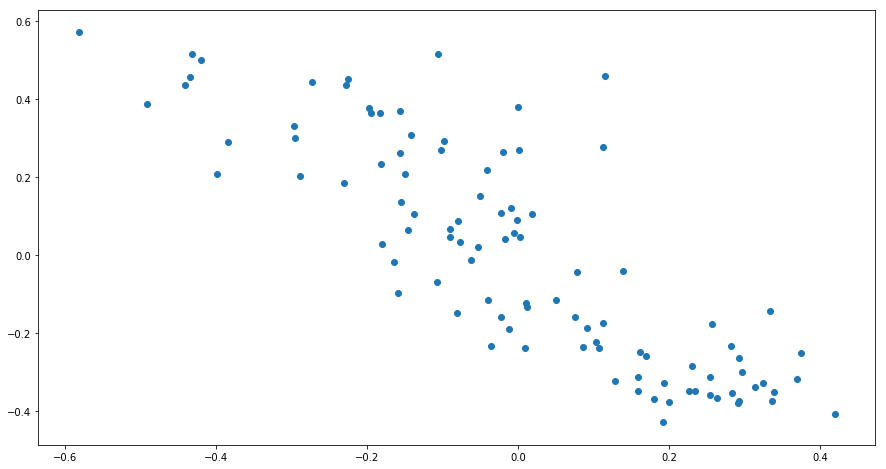

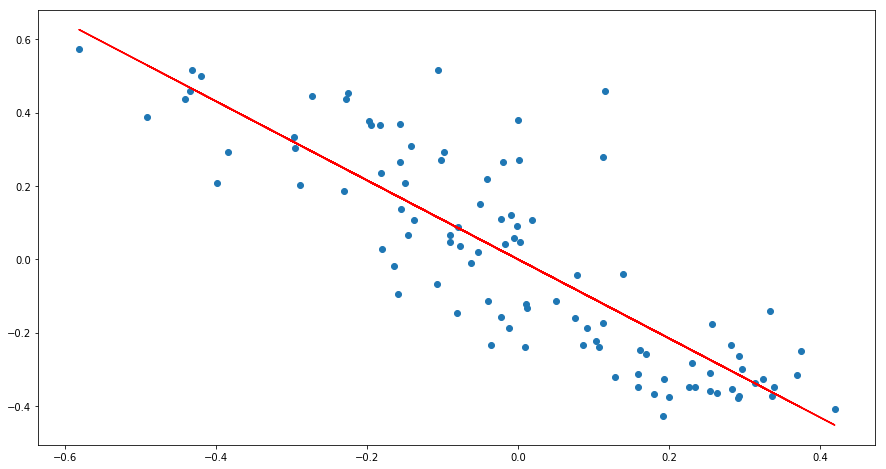

In [18]:
# DATA VISUALIZALTION
plt.figure(figsize=(15,8))
plt.scatter(humid,temper)    

plt.figure(figsize=(15,8))
plt.scatter(humid,temper)    
plothumid = humid[:]
humid = humid.reshape(1,len(humid))
temper = temper.reshape(1,len(temper))analysis / comparison of algorithms

linreg = LinearRegress()
linreg.train(humid.T,temper.T)

useout = linreg.use(humid.T)
print("plotting DATA")
plt.plot(humid.T,useout,color = "red")
plt.show()




train response


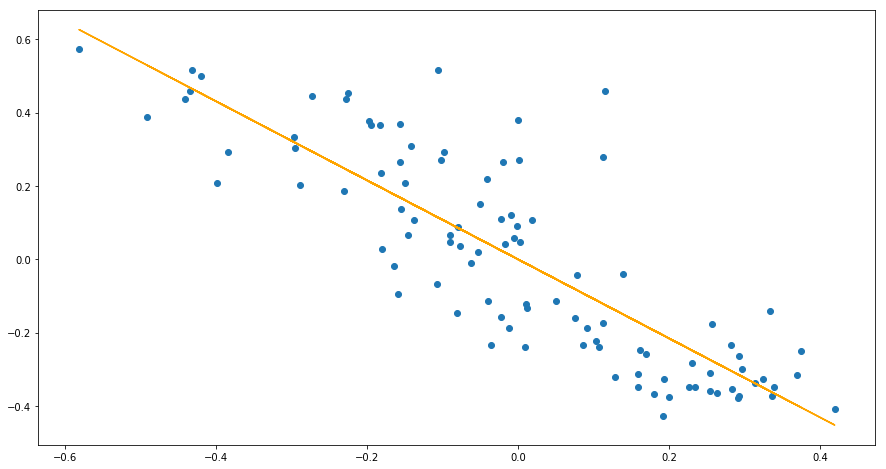

In [19]:
# Applying Linear Regression on Normalized Data

linlms = LMS(0.02)
#print ("REGRESSION OUT")
linlms.train(humid.T,temper.T)

useout1 = linlms.use(humid.T)analysis / comparison of algorithms
plt.figure(figsize=(15,8))
plt.scatter(humid.T,temper.T)
plt.plot(humid.T,useout1,color = "orange")
#print("plotting DATA")
plt.show()



[ 1.         -0.28824867]
returning stochastic
plotting DATA


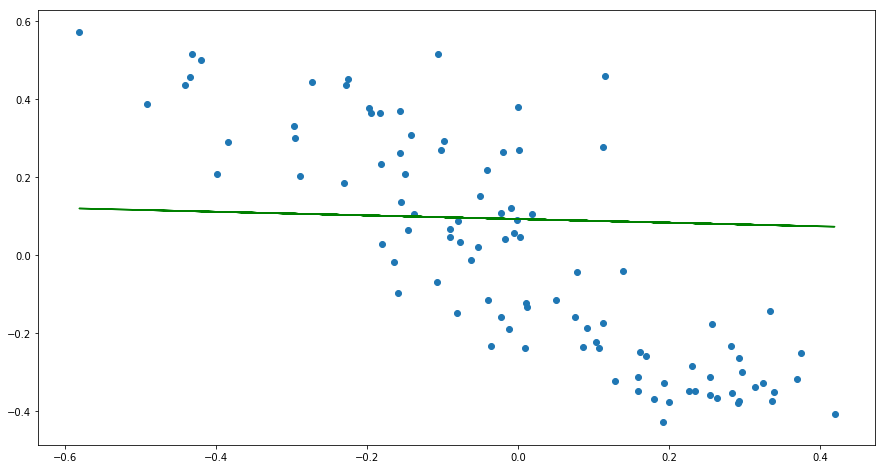

In [22]:
linlms = LMS(0.125)
#print(humid.T)
#print(humid.T[0])
humid_normal = humid_normal.reshape(len(humid_normal),1)
temper_normal = temper_normal.reshape(len(temper_normal),1)
linlms.train_step_full(humid_normal,temper_normal)

useout1 = linlms.use(humid_normal)
plt.figure(figsize=(15,8))
plt.scatter(humid_normal,temper_normal)
plt.plot(humid_normal,useout1,color="green")
print("plotting DATA")
plt.show()

[ 1.         -0.17660412]
returning stochastic
[[-0.00066217]
 [-0.00062537]
 [-0.00062411]
 ...
 [-0.00066154]
 [-0.00066281]
 [-0.00066788]]
train response
plotting DATA


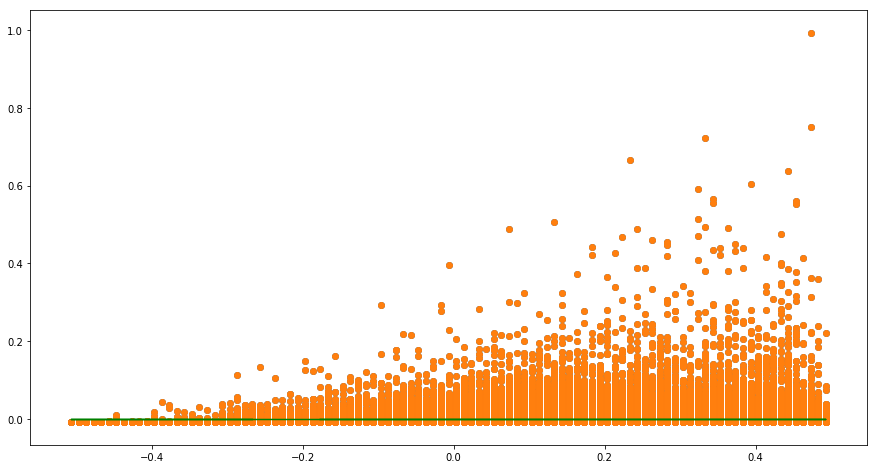

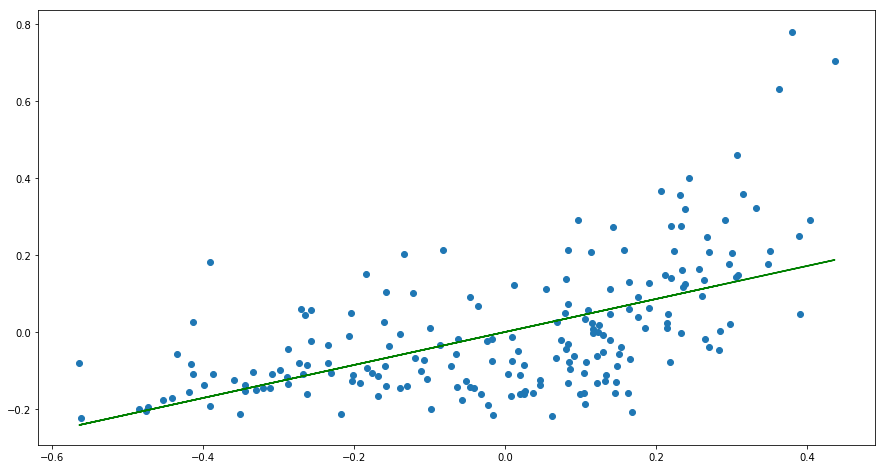

In [23]:
plt.figure(figsize=(15,8))


humid = np.array(df["Humidity3pm"])
temper = np.array(df["Rainfall"])

humid_max = humid.max()
humid_min = humid.min()
humid_avg = humid.mean()

temper_max = temper.max()
temper_min = temper.min()
temper_avg = temper.mean()


for i in range(len(humid)):
    humid[i] = (humid[i] - humid_avg)/(humid_max - humid_min)
    
for i in range(len(temper)):
    temper[i] = (temper[i] - temper_avg)/(temper_max - temper_min)
    
humid = humid.reshape(len(humid),1)
temper = temper.reshape(len(temper),1)
plt.scatter(humid,temper)
linlms.train_step_full(humid,temper)

useout1 = linlms.use(humid)
plt.scatter(humid,temper)
plt.plot(humid,useout1,color="green")
print(useout1)

plt.figure(figsize=(15,8))
canberra_rainfall_df = canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Portland")  | (canberra_rainfall_df["Location"]=="MelbourneAirport") ]



linlms = LMS(0.01)
#print(humid.T)
#print(humid.T[0])
humidity_plot = canberra_rainfall_df["Humidity3pm"].values.reshape(len(canberra_rainfall_df["Humidity3pm"]),1)
rainfall_plot = canberra_rainfall_df["Rainfall"].values.reshape(len(canberra_rainfall_df["Rainfall"]),1)
humid = np.array(canberra_rainfall_df["Humidity3pm"])
temper = np.array(canberra_rainfall_danalysis / comparison of algorithmsf["Rainfall"])

humid_max = humid.max()
humid_min = humid.min()
humid_avg = humid.mean()

temper_max = temper.max()
temper_min = temper.min()
temper_avg = temper.mean()


for i in range(len(humid)):
    humid[i] = (humid[i] - humid_avg)/(humid_max - humid_min)
    
for i in range(len(temper)):
    temper[i] = (temper[i] - temper_avg)/(temper_max - temper_min)
    
humid = humid.reshape(len(humid),1)
temper = temper.reshape(len(temper),1)

#print(humid)
#print(temper)
linlms.train(humid,temper)

useout1 = linlms.use(humid)
plt.scatter(humid,temper)
plt.plot(humid,useout1,color="green")
print("plotting DATA")
plt.show()

In [ ]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

In [ ]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

In [ ]:
lms.train(X, T)
plt.plot(lms.use(X))

# Conclusions
The assignment gives us a good idea about finding the best minimum cost function for different sets of data we have been provided. This will intern give us a good insight of why some methods are better. Generally each method can be better utilized in an optmized fashion with better normalization. When we have enough iterations and select normalized data with a good alpha (learning rate), we figure that the data can easily be fitted with a line best possible and thereby the data can be visualized well, and future predictions can be close to best.


# References

[1] Book: Deep Learning By GoodFellow
[2] Coursera: Machine Learning by Andrew NG

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [29]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
[[ 3.  3. -2.]]
training  LMS_All ...
[1. 2. 5.]
returning stochastic
training  LMS_1STEP ...
[[-0.02 -0.04 -0.1 ]]
---- Testing  LS ... passed.
---- Testing  LMS_All ... failed. 36.94621256583683 2.8753214702
---- Testing  LMS_1STEP ... passed.


# EXTRA CREDIT  

To find the best features which give us best results we use Principal Component Analysis. This is done by making a covariance matrix, and then calculating covariance between different data parts of the different columns and finding the best possible fit as done below. Our data of weather has many data sets including date a lot of names, dates and other data. 

In [66]:
#PRINCIPAL COMPONENT ANALYSIS

#print(df)

pca_df = df[["MinTemp","MaxTemp","Rainfall","WindGustSpeed","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm"]]
#print(pca_df)

#print(pca_df.values.T[0])

pcnumpy = pca_df.values.T

#print(pcnumpy)


for i in range(len(pcnumpy)):
    aver = pcnumpy[i].mean()
    max1 = pcnumpy[i].max()
    min1 = pcnumpy[i].min()
    for j in range(len(pcnumpy[i])):
        pcnumpy[i][j] = (pcnumpy[i][j] - aver)/(max1 - min1)

#print("NORMALIZED")
print(pcnumpy)

cov_matrix = [[None for i in range(len(pcnumpy))] for j in range(len(pcnumpy))]

for i in range(len(pcnumpy)):
    for j in range(len(pcnumpy)):
        cov_matrix[i][j] = np.cov(pcnumpy[i],pcnumpy[j])


print("Eigen Values gen")
print(cov_matrix)

print(cov_matrix[0])

eigval,eigvec = np.linalg.eigh(cov_matrix)


print(eigval)

print("COVARIANCE MATRIX HERE - EIGEN VALUES OBTAINED")
print(np.linalg.eig(cov_matrix))
        
        
        
        
        
        





[[ 0.11296648  0.07097173  0.07097173 ... -0.01301777 -0.09963195
  -0.1416267 ]
 [ 0.19220213 -0.04870697 -0.11916151 ... -0.03734333 -0.02597969
   0.07174758]
 [-0.00449713 -0.00123271  0.03521996 ... -0.00721747 -0.00721747
  -0.00721747]
 ...
 [ 0.38994534  0.38994534  0.38994534 ...  0.38994534 -0.0544991
  -0.27672133]
 [-0.00092157 -0.04795127 -0.01082256 ... -0.09745622 -0.14943642
  -0.06775325]
 [ 0.16366409 -0.11855813 -0.14522479 ... -0.02966924 -0.00078035
   0.08144187]]
Eigen Values gen
[[array([[0.02863311, 0.02863311],
       [0.02863311, 0.02863311]]), array([[0.02863311, 0.02091506],
       [0.02091506, 0.02648489]]), array([[0.02863311, 0.00048845],
       [0.00048845, 0.00066724]]), array([[0.02863311, 0.00243438],
       [0.00243438, 0.01306136]]), array([[0.02863311, 0.00058749],
       [0.00058749, 0.04380386]]), array([[ 0.02863311, -0.00901657],
       [-0.00901657,  0.01356255]]), array([[ 0.02863311, -0.00914005],
       [-0.00914005,  0.01257952]]), array(